<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Exercise 1 - Foreseeing Variable Problems when Building ML Models</h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Objectives

A variable is a characteristic, number, or quantity that can be measured or counted. Most variables in a dataset are either numerical or categorical. Numerical variables take numbers as values and can be discrete or continuous, whereas for categorical variables, the values are selected from a group of categories, also called labels.

Variables in their original, raw format are not suitable to train machine learning algorithms. In fact, we need to consider many aspects of a variable to build powerful machine learning models. These aspects include variable type, missing data, cardinality and category frequency, variable distribution and its relationship with the target, outliers, and feature magnitude.

Why do we need to consider all these aspects? For multiple reasons. 
* First, scikit-learn, the open source Python library for machine learning, does not support missing values or strings (the categories) as inputs for machine learning algorithms, so we need to convert those values into numbers. 

* Second, the number of missing values or the distributions of the strings in categorical variables (known as cardinality and frequency) may affect model performance or inform the technique we should implement to replace them by numbers. 

* Third, some machine learning algorithms make assumptions about the distributions of the variables and their relationship with the target. 

* Finally, variable distribution, outliers, and feature magnitude may also affect machine learning model performance.

Therefore, it is important to understand, identify, and quantify all these aspects of a variable to be able to choose the appropriate feature engineering technique. This week, we will learn how to identify and quantify these variable characteristics.

Pls refer to the `Practical 1.0 - Practical 1.9` in the seperate files for details. 

## Exercise

Use airbnb singapore dataset (`airbnb_sg.csv`) and explore the data properly.

In [1]:
# Task 0: import all the required packages

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Task 1: load the airbnb_sg dataset and show the first 10 records

df = pd.read_csv('./data/airbnb_sg.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [3]:
# Task 2: Visualise the percentage of missing values for each variable
df.isnull().mean()*100


id                                 0.000000
name                               0.025294
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       34.880486
reviews_per_month                 34.880486
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [4]:
# Task 3: drop the records with missing values
df=df.dropna()
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 7767
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5148 non-null   int64  
 1   name                            5148 non-null   object 
 2   host_id                         5148 non-null   int64  
 3   host_name                       5148 non-null   object 
 4   neighbourhood_group             5148 non-null   object 
 5   neighbourhood                   5148 non-null   object 
 6   latitude                        5148 non-null   float64
 7   longitude                       5148 non-null   float64
 8   room_type                       5148 non-null   object 
 9   price                           5148 non-null   int64  
 10  minimum_nights                  5148 non-null   int64  
 11  number_of_reviews               5148 non-null   int64  
 12  last_review                     51

<AxesSubplot:>

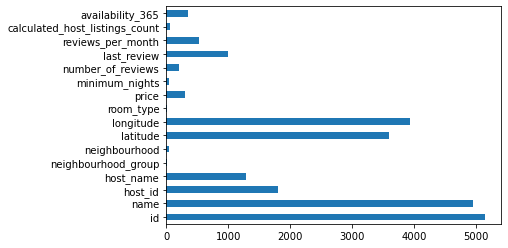

In [5]:
# Task 4: visualise the cardinality of the variables 
df.nunique().plot.barh()

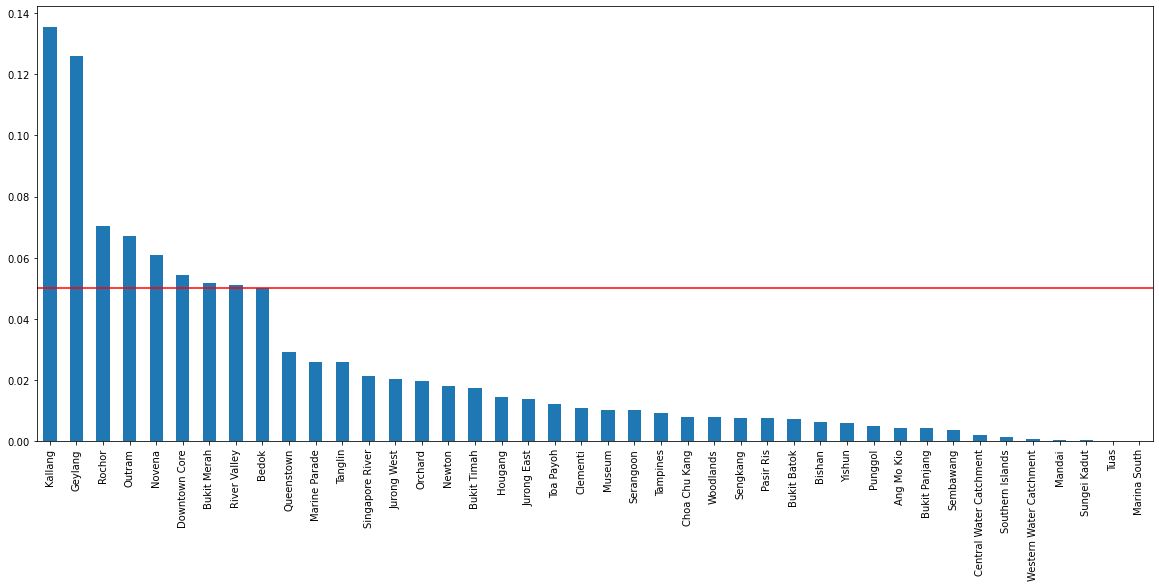

In [6]:
# Task 5:Identify the rare categories in neighbourhood variable and visualise the results
label_freq = df['neighbourhood'].value_counts()/len(df)
fig = label_freq.sort_values(ascending=False).plot.bar(figsize = (20,8))
fig.axhline(y = 0.05, c = 'r')
#fig.set_ylim(top = 0.05)

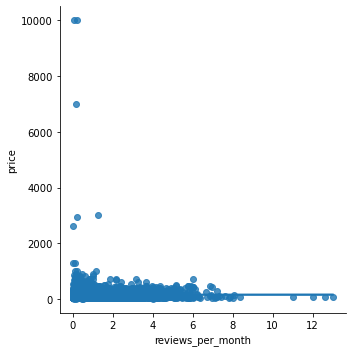

In [7]:
# Task 6: Explore the relationship between reviews_per_month and price. Is it a linear relationship?
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.lmplot(x="reviews_per_month", y="price", data=df)
#plt.ylim(top = 1400, bottom = -100)
#plt.xlim(right=9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-100.0, 1000.0)

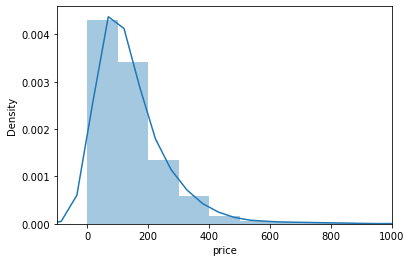

In [8]:
# Task 7: Use histogram to check whether price is following normal distribution or not?
ax = sns.distplot(df['price'], bins=100)
ax.set_xlim(left=-100, right=1000)

In [9]:
# Task 8: Find the outliers in the price column
def find_boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)
    return upper_boundary, lower_boundary
upper_b, lower_b = find_boundaries(df, 'price')
outliers = np.where(df['price'] > upper_b, True,
                    np.where(df['price'] < lower_b, True, False))
outliers.sum()
outliers_df = df.loc[outliers, 'price']
outliers_df.head()

12      417
38     2604
77      400
99      800
100     550
Name: price, dtype: int64